![](https://www.franchisemart.in/img/logos/2986.gif)

# BIGMART SALES MINI PROJECT:

#### By : Yoshva Dani Juvenal S
#### Email      : yoshuvajuvenal52@gmail.com
#### Linkedin: https://www.linkedin.com/in/yoshva-dani-juvenal-155874273

# INTRODUCTION:

## Problem Statement:
   

#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales. The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## Goal of the Project:

#### The objective is to build a model that can forecast how much each product is expected to sell at each store. By doing this, BigMart aims to identify the characteristics of both products and stores that have the most significant impact on sales.

# Roadmap for the Project:

### DATA EXPLORATION:

#### In this section we will explore the datasets and figure out its features and characteristics.

#### We can gather the following insights after exploration:

####    1) There are null values in both testing and training datasets.
####    2) There are several categorical values that we will need to encode for prediction and model fitting.

### DATA PREPROCESSING:

####      1) Clean the data.
####      2) Extract the features.
####      3) Standardize and Normalize the data if needed.

### DATA ANALYSIS:

####      1) Finding correlations between different variables.
####      2) See the distribution of items in various categories based on the respective columns.
####      3) Plotting some regression correlations.

### DATA MODELING:

#### The models we will use are:
#####      1) Simple Linear Regression.
#####      2) Random Forest Regression.
#####      3) XGBoost regression.

### CONCLUSION:

# INSTALL LIBRARIES:

In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install dtale

In [3]:
# EDA using Klib Library:
!pip install klib

In [4]:
# XG Boost Regressor:
!pip install xgboost

In [5]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


# IMPORT LIBRARIES:

In [6]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# DATA COLLECTION AND PROCESSING:

In [7]:
df_train = pd.read_csv("D:\Technocolabs Mini Project\Train.csv")
df_test = pd.read_csv("D:\Technocolabs Mini Project\Test.csv")

In [8]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [9]:
df_test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [10]:
df_train.shape

(8523, 12)

## CHECKING FOR NULL VALUES:

In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

### HANDLING THE NUMERICAL MISSING VALUES WITH MEAN IMPUTATION:

In [16]:
#Filling up the null values of Item Weight with mean Imputation:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [17]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

### HANDLING THE CATEGORICAL MISSING VALUES BY MODE IMPUTATION:

In [20]:
#Outlet Size is of categorical column. Filling up the null value with Mode Imputation:
df_train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

<Axes: >

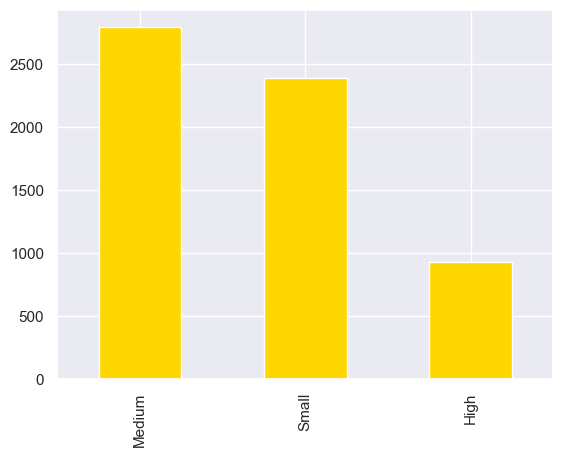

In [21]:
df_train['Outlet_Size'].value_counts().plot(kind="bar",color= "Gold")

In [22]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [23]:
# Filling up the NUll Values with Mode Imputation:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)

In [24]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [26]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [27]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Exploratory Data Analysis(EDA):

## EDA using Pandas-Profiling Library:

In [31]:
#EDA using pandas-profiling Library:
from pandas_profiling import ProfileReport

2023-09-07 17:48:20,447 - INFO     - Pandas backend loaded 1.5.3
2023-09-07 17:48:20,468 - INFO     - Numpy backend loaded 1.23.5
2023-09-07 17:48:20,471 - INFO     - Pyspark backend NOT loaded
2023-09-07 17:48:20,472 - INFO     - Python backend loaded


In [32]:
profile = ProfileReport(df_train, title = "Pandas Profiling Report")

In [33]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
import klib

GridSpec(6, 7)

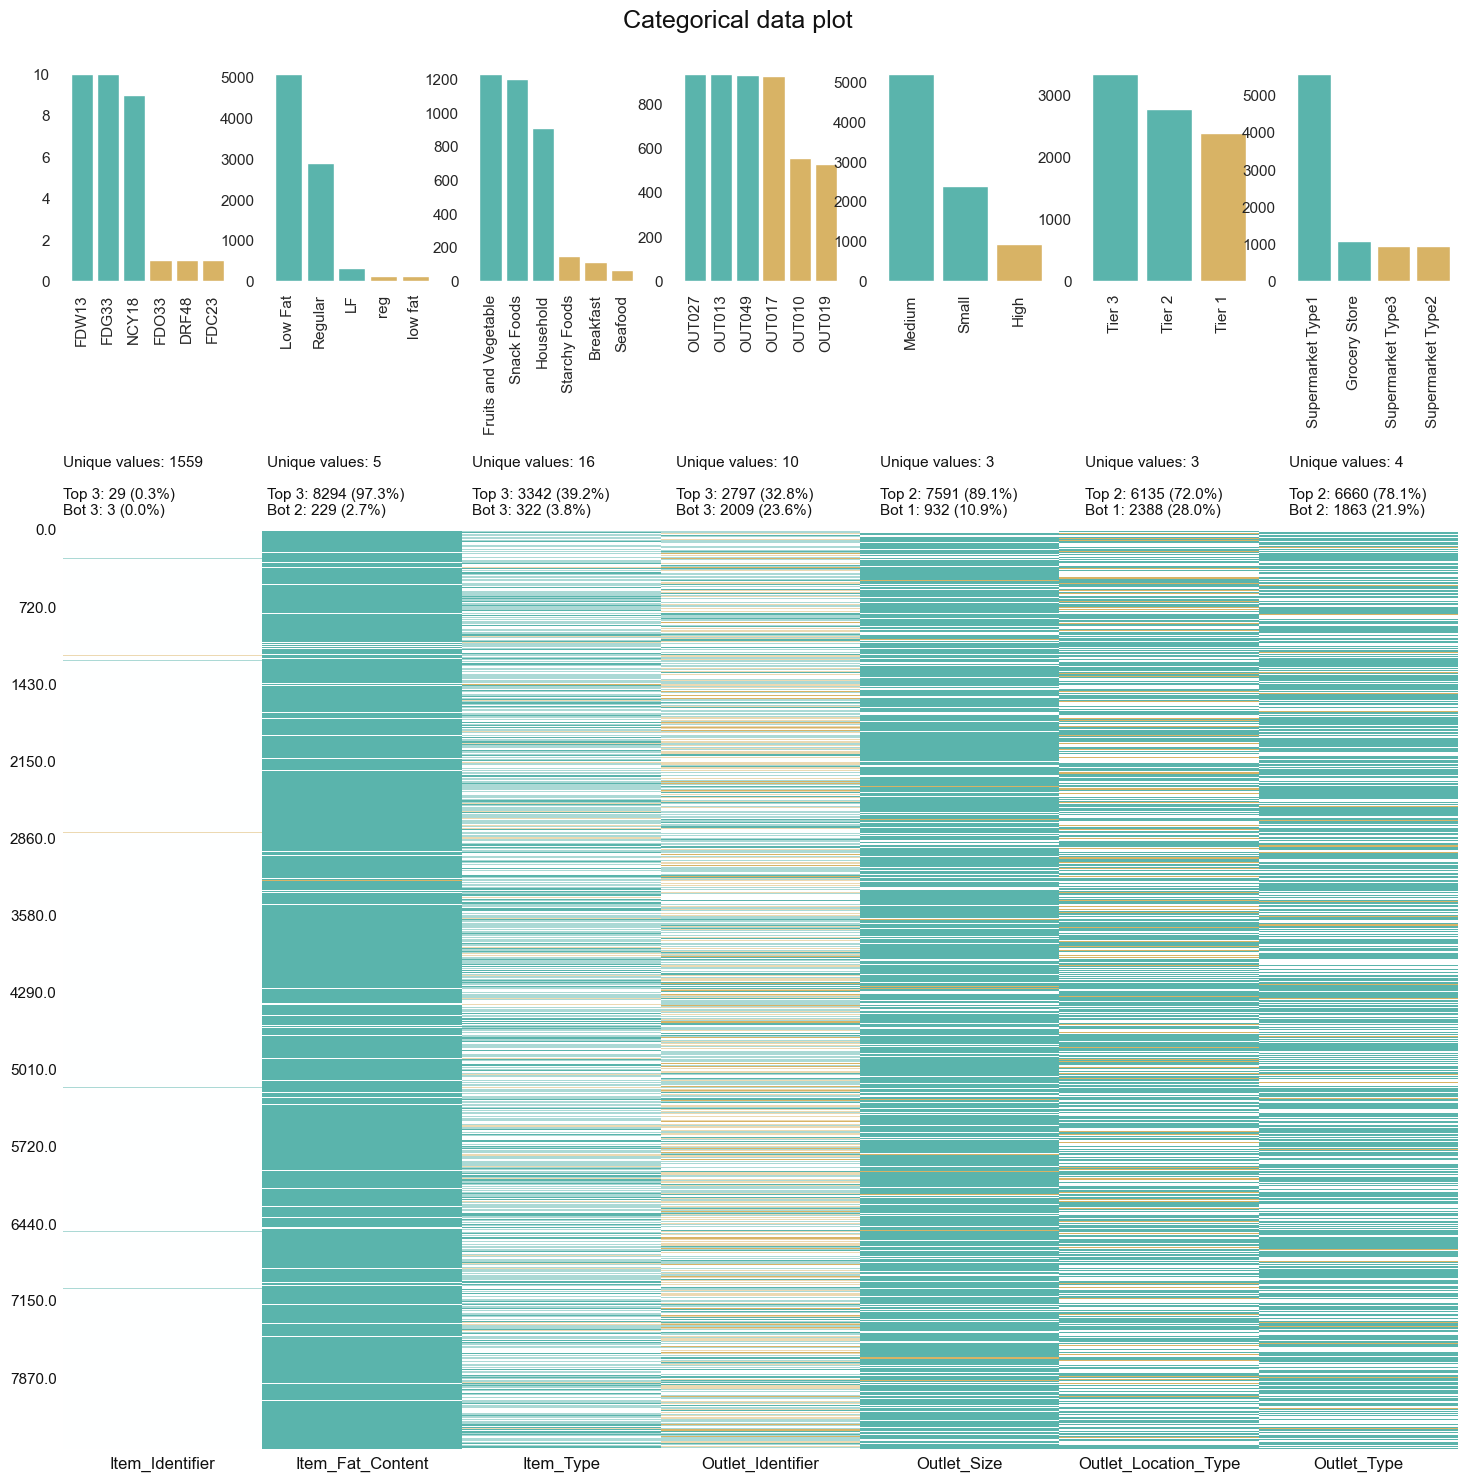

In [35]:
# Visualization of the number and frequency of categorical features:
klib.cat_plot(df_train)

### CORRELATION MATRIX:

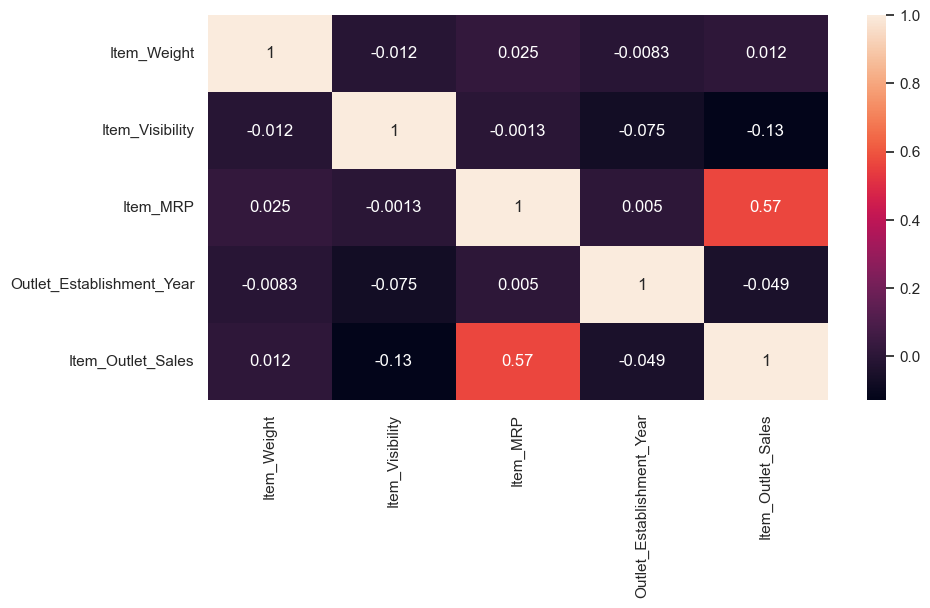

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [37]:
#color-encoded correlation matrix: 
klib.corr_mat(df_train)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


# HYPOTHESIS GENERATION:

## Outlet hypothesis:
    
     H1 Bigger outlets should sell more.
     H2 Tier 3 location outlets shoul sell more.
     H3 Supermarket Type1 is the outlet type with more sales.
     H4 Older outlets should sell more.

##  Item hypothesis:

    H5 Regular fat items should sell more.
    H6 Items with bigger visibility should sell more.
    H7 Expensive products should sell less.

## UNIVARIATE ANALYSIS:

### INDIVIDUAL OBJECT VARIABLES:

<Axes: >

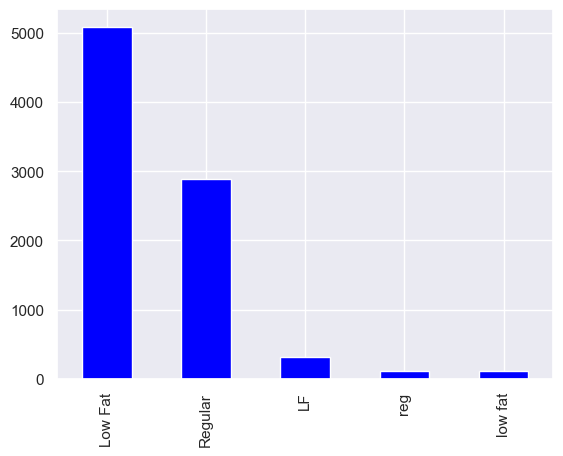

In [38]:
df_train['Item_Fat_Content'].value_counts().plot(kind='bar',color='blue')

#### MERGING LF,low fat to "Low Fat" & reg to "Regular":

In [39]:
df_train =df_train.replace(to_replace="low fat", value="Low Fat")
df_train =df_train.replace(to_replace="LF", value="Low Fat")
df_train =df_train.replace(to_replace="reg", value="Regular")

<Axes: >

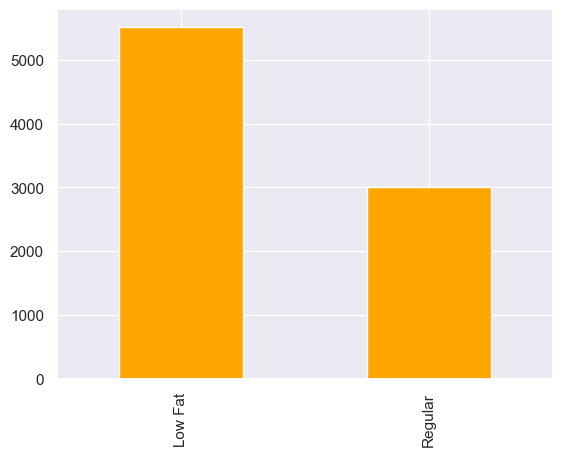

In [40]:
df_train['Item_Fat_Content'].value_counts().plot(kind='bar',color='Orange')

<Axes: >

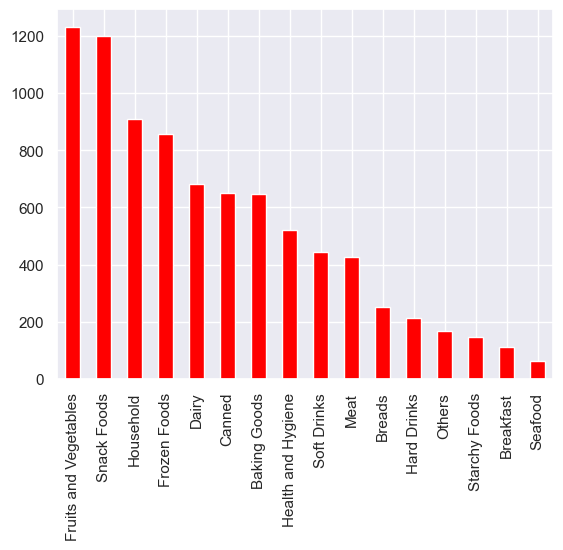

In [41]:
# Visualizing Item Type to find Outliers:
df_train['Item_Type'].value_counts().plot(kind="bar", color="red")

<Axes: >

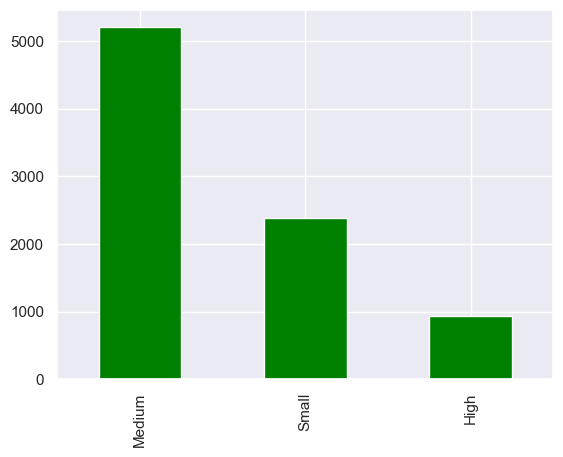

In [42]:
# Visualizing outlet size:
df_train['Outlet_Size'].value_counts().plot(kind="bar", color="green")

<Axes: >

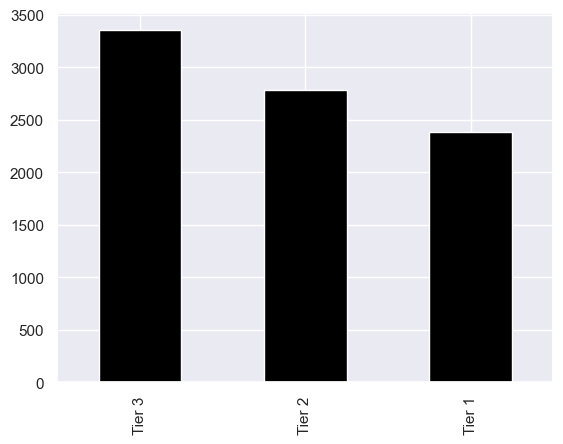

In [43]:
# Visualizing Outlet Location Type:
df_train["Outlet_Location_Type"].value_counts().plot(kind="bar", color="black")

<Axes: >

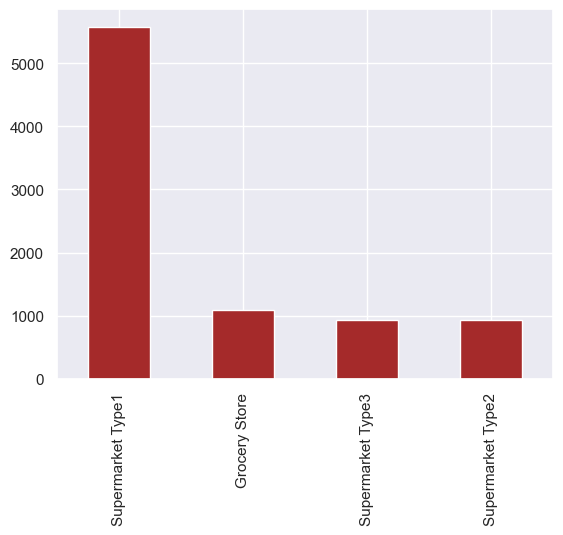

In [44]:
# Visualizing Outlet Type:
df_train["Outlet_Type"].value_counts().plot(kind="bar", color="brown")

In [45]:
df_train["Item_Weight"].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

### INDIVIDUAL INT/FLOAT VARIABLES:

<Axes: xlabel='Item_Weight', ylabel='Count'>

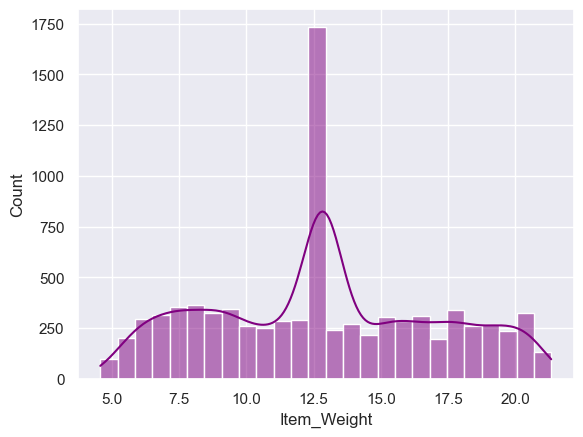

In [46]:
# Checking Individual columns of FLOAT and INTEGER :
# Visualizing Item Weight:
y = df_train["Item_Weight"]
plt.figure(1);
sns.histplot(y, kde=True, color="purple")

<Axes: xlabel='Item_Visibility', ylabel='Count'>

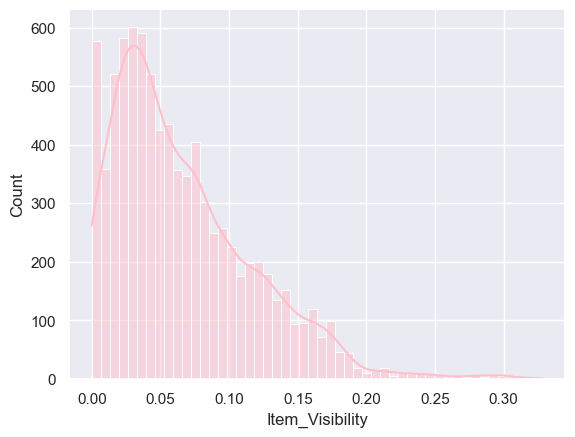

In [47]:
# Visualizing Item Visibility:
y = df_train["Item_Visibility"]
plt.figure(1);
sns.histplot(y, kde=True, color="pink")

<Axes: xlabel='Item_MRP', ylabel='Count'>

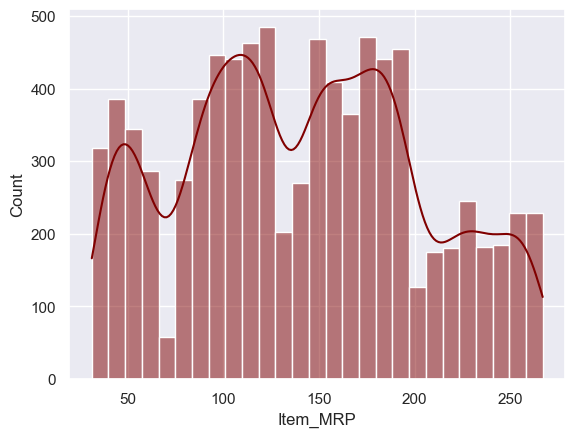

In [48]:
# Visualization of Item MRP:
y = df_train["Item_MRP"]
plt.figure(1);
sns.histplot(y, kde=True, color="Maroon")

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Count'>

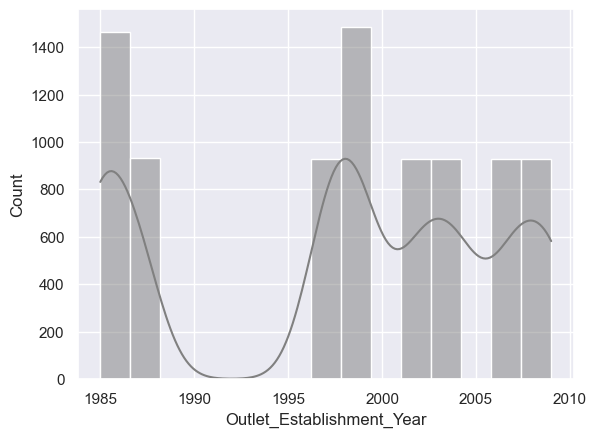

In [49]:
#Visualization of Outlet Establishment year:
y = df_train["Outlet_Establishment_Year"]
plt.figure(1);
sns.histplot(y, kde=True, color="grey")

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

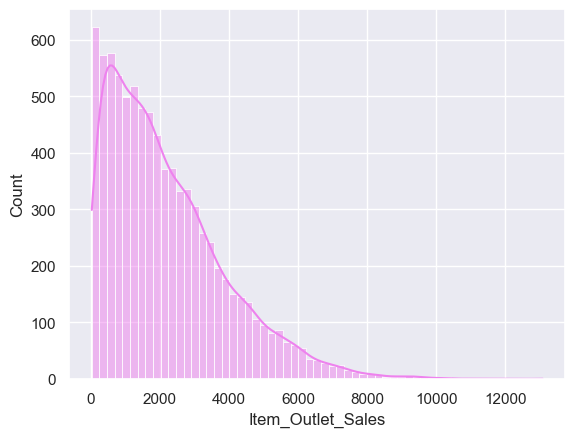

In [50]:
# Visualization of Item Outlet Sales:
y = df_train["Item_Outlet_Sales"]
plt.figure(1);
sns.histplot(y, kde=True, color="Violet")

In [51]:
df_train['Outlet_Age'], df_test['Outlet_Age']= df_train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), df_test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

# HYPOTHESIS TESTING:

## BIVARIATE ANALYSIS:

#### Null Hypothesis (H0): There is no significant difference in sales among different item types in the dataset.
#### Alternate Hypothesis (H1): There is a significant difference in sales among different item types in the dataset.

Text(0, 0.5, 'Item_Outlet_Sales')

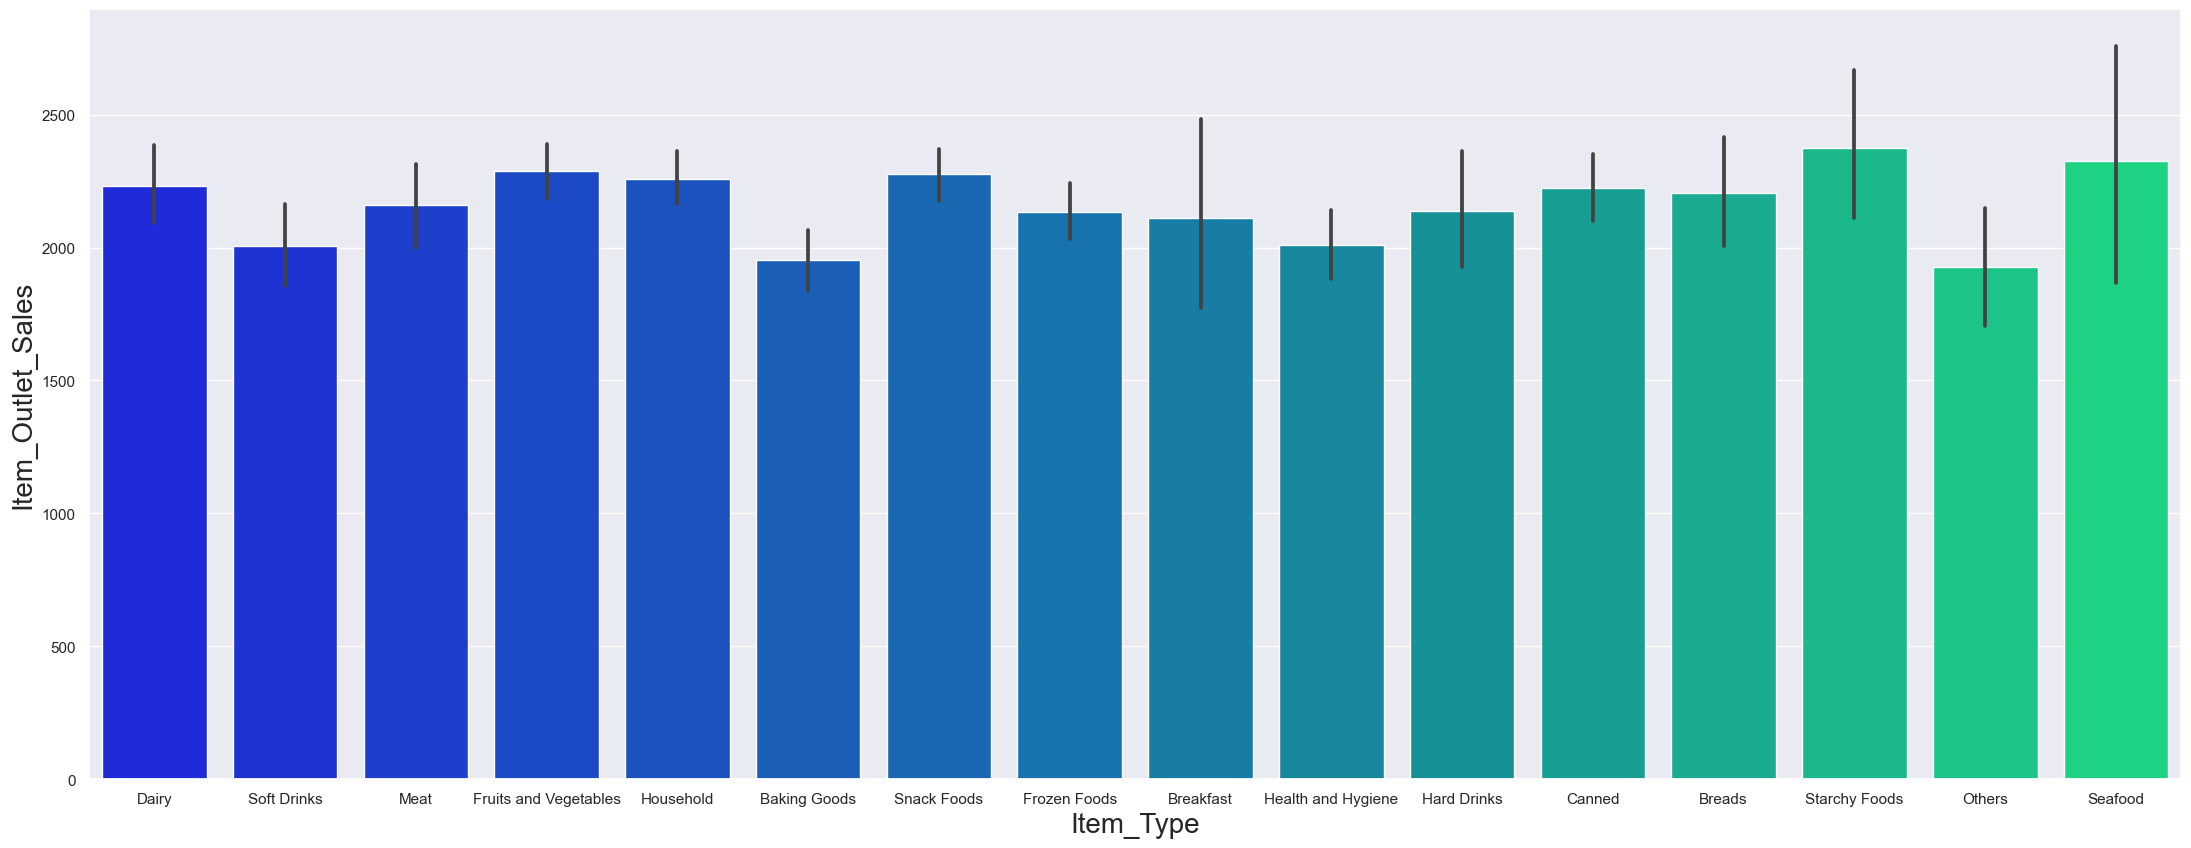

In [52]:
# BIvariate Plotting:(Item Type with Item Outlet Sales)
plt.figure(figsize=(27, 10))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df_train, palette='winter')
plt.xlabel('Item_Type', fontsize=20)
plt.ylabel("Item_Outlet_Sales", fontsize=20)

#### Null Hypothesis (H0): There is no significant difference in profitability between supermarket type 1 and type 3. The mean        profitability for both types is equal.

#### Alternative Hypothesis (H1): Supermarket type 3 is significantly more profitable than type 1.

Text(0, 0.5, 'Item_Outlet_Sales')

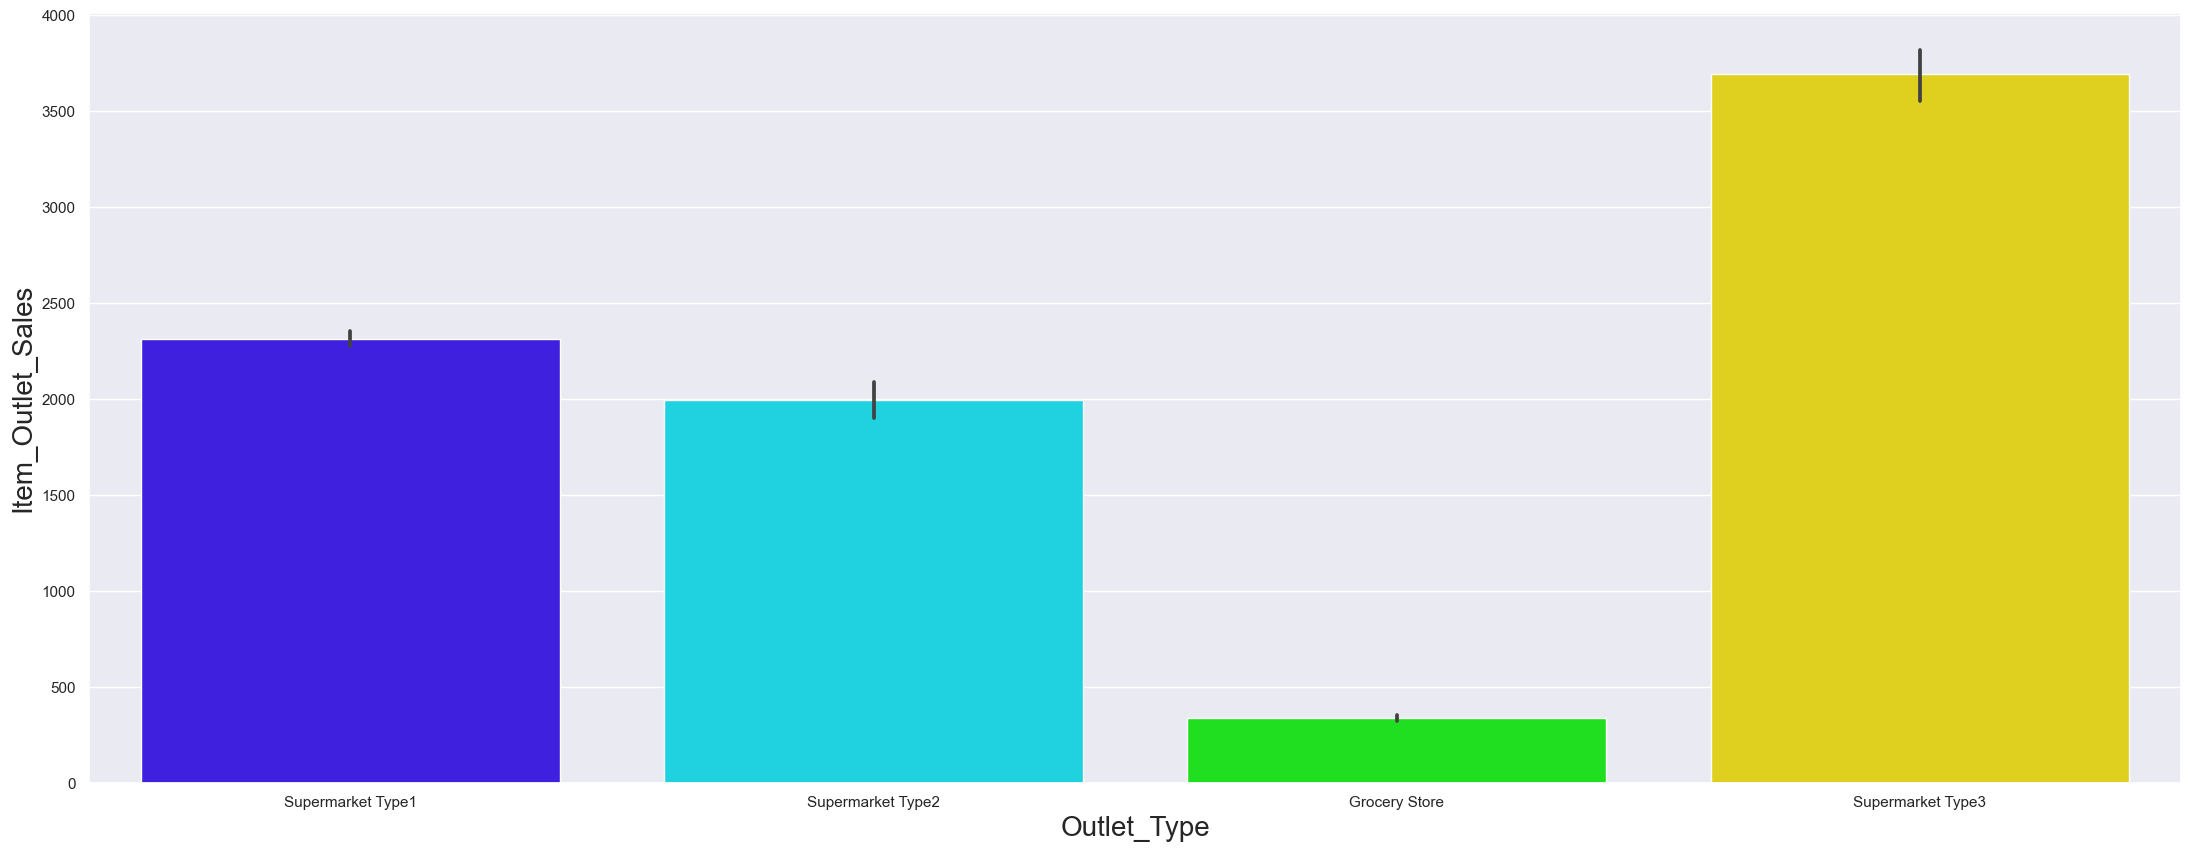

In [53]:
# Visuaizing Bivariate of Outlet Type with Item Outlet Sales:
plt.figure(figsize=(27,10))
sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df_train, palette="gist_rainbow_r")
plt.xlabel("Outlet_Type", fontsize=20)
plt.ylabel("Item_Outlet_Sales", fontsize=20)

#### Null Hypothesis (H0): There is no significant difference in sales between medium and high outlet sizes. The mean sales for both outlet sizes are equal.

#### Alternative Hypothesis (H1): Medium and high outlet sizes have significantly different sales, and one of them has higher sales than the other.

Text(0, 0.5, 'Item_Outlet_Sales')

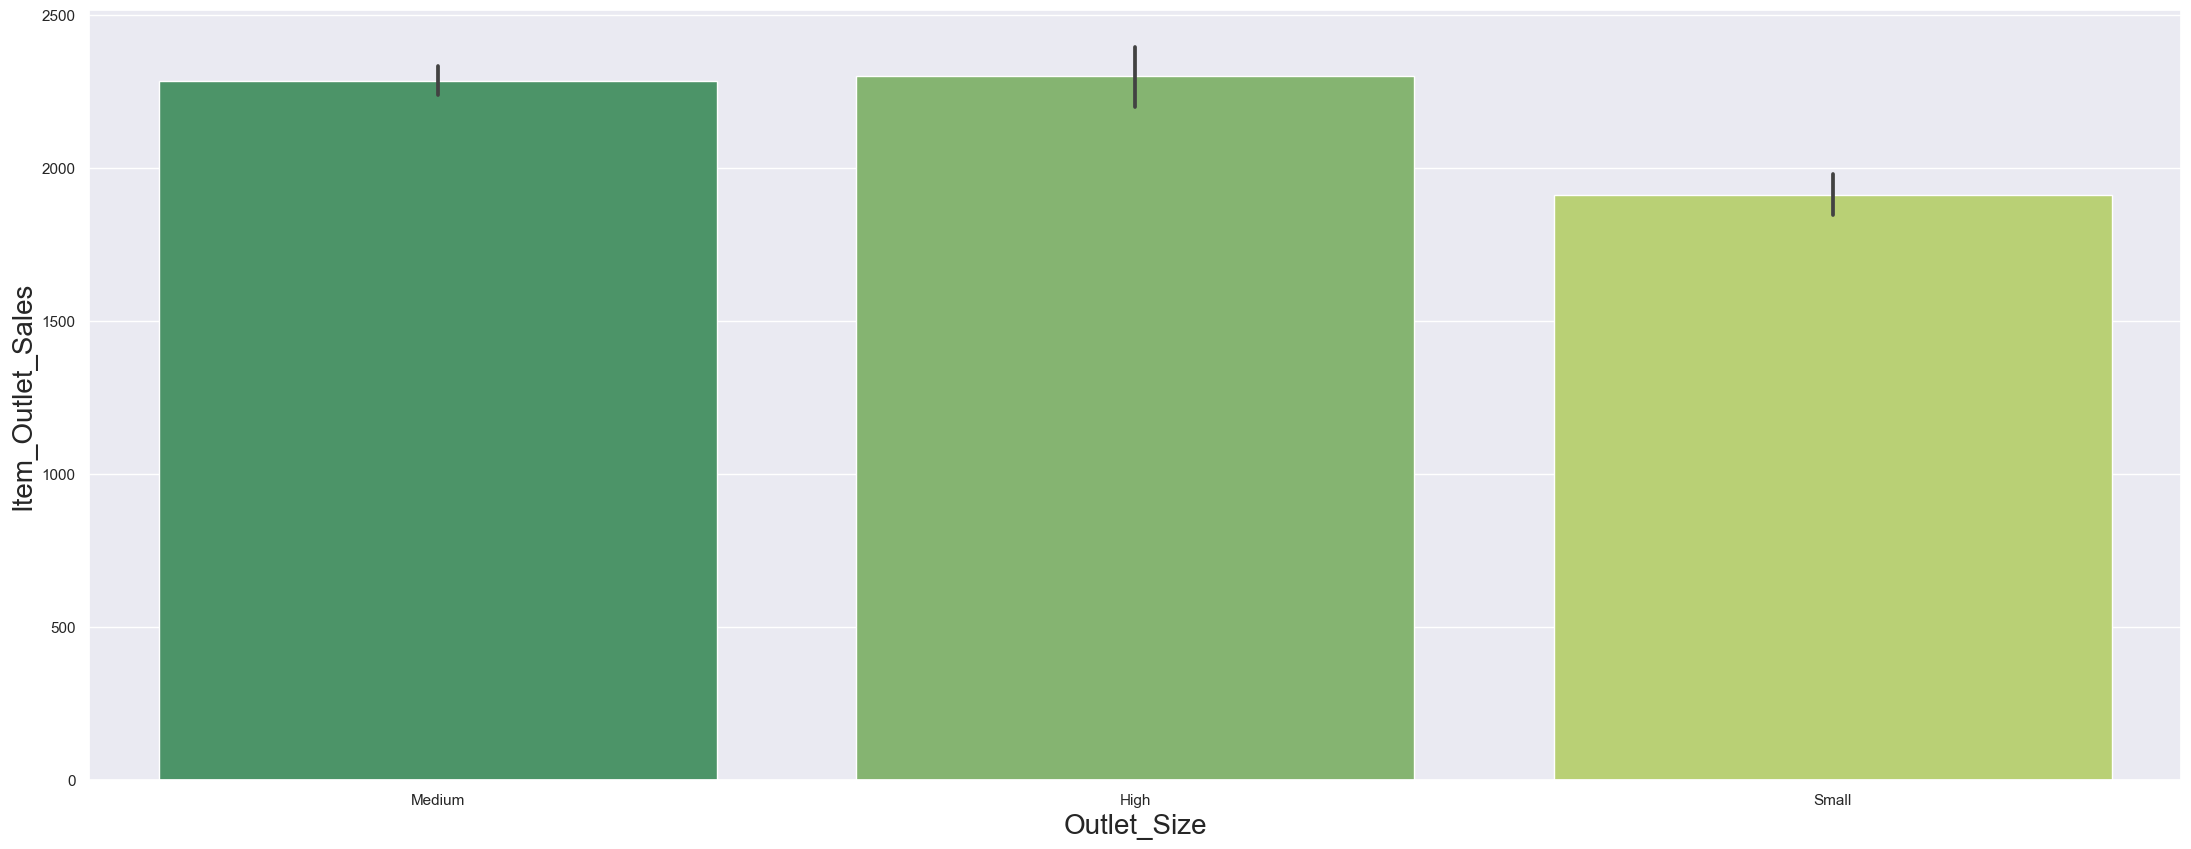

In [54]:
# Visuaizing Bivariate of Outlet Size with Item Outlet Sales:
plt.figure(figsize=(27,10))
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", data=df_train, palette="summer")
plt.xlabel("Outlet_Size", fontsize=20)
plt.ylabel("Item_Outlet_Sales", fontsize=20)

#### Null Hypothesis (H0): The sales in tier 2 and tier 3 locations are equal; there is no significant difference between the mean sales of the two tiers.

#### Alternative Hypothesis (H1): The sales in tier 2 and tier 3 locations are not equal; there is a significant difference between the mean sales of the two tiers, indicating that one tier has higher sales than the other.

Text(0, 0.5, 'Item_Outlet_Sales')

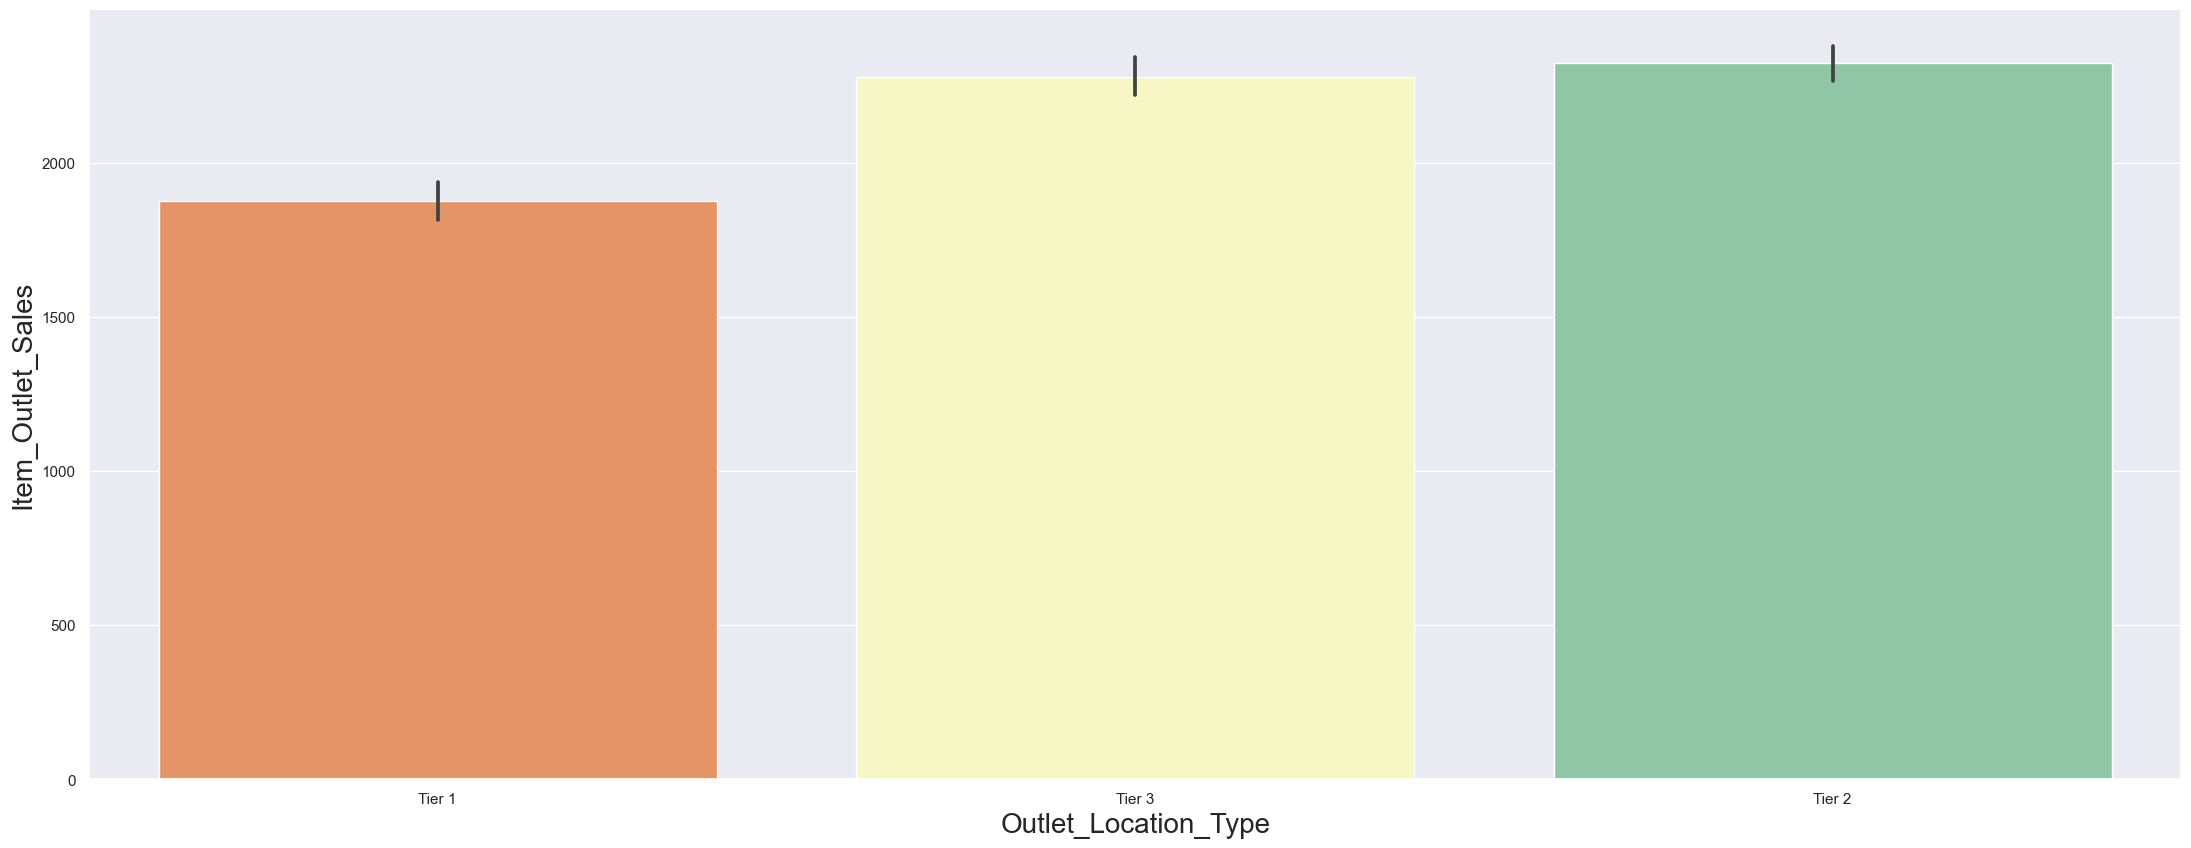

In [55]:
# Visuaizing Bivariate of Outlet Location Type with Item Outlet Sales:
plt.figure(figsize=(27,10))
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=df_train, palette="Spectral")
plt.xlabel("Outlet_Location_Type", fontsize=20)
plt.ylabel("Item_Outlet_Sales", fontsize=20)

# FEATURE ENGINEERING:

In [56]:
num = df_train.select_dtypes('number').columns.to_list()
cat = df_train.select_dtypes('object').columns.to_list()
BM_num = df_train[num]
BM_cat = df_train[cat]
[df_train[category].value_counts() for category in cat[1:]]


[Low Fat    5517
 Regular    3006
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type, dtype: int64,
 Supermarket Type1    5577
 Grocery 

In [57]:
BM_cat.apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

### Encoding Categorical Variables:

In [58]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

Label = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']

for i in Label:
    df_train[i] = le.fit_transform(df_train[i])

df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300000,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.920000,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.500000,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.200000,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.930000,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33
5,FDP36,10.395000,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,Supermarket Type2,556.6088,11
6,FDO10,13.650000,1,0.012741,Snack Foods,57.6588,OUT013,1987,0,2,Supermarket Type1,343.5528,33
7,FDP10,12.857645,0,0.127470,Snack Foods,107.7622,OUT027,1985,1,2,Supermarket Type3,4022.7636,35
8,FDH17,16.200000,1,0.016687,Frozen Foods,96.9726,OUT045,2002,1,1,Supermarket Type1,1076.5986,18
9,FDU28,19.200000,1,0.094450,Frozen Foods,187.8214,OUT017,2007,1,1,Supermarket Type1,4710.5350,13


In [59]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(df_train[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(df_test[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names_out(cols)
te_oh.columns = OH_encoder.get_feature_names_out(cols)

# One-hot encoding removed index; put it back
tr_oh.index = df_train.index
te_oh.index = df_test.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired)
tr_fe = pd.concat([df_train, tr_oh], axis=1)
te_fe = pd.concat([df_test, te_oh], axis=1)
tr_fe.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300000,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.920000,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,...,0,0,0,0,1,0,0,0,1,0
2,FDN15,17.500000,0,0.016760,Meat,141.6180,OUT049,1999,1,0,...,1,0,0,0,0,0,0,1,0,0
3,FDX07,19.200000,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.930000,0,0.000000,Household,53.8614,OUT013,1987,0,2,...,0,0,0,0,0,0,0,1,0,0
5,FDP36,10.395000,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,...,0,0,0,0,0,0,0,0,1,0
6,FDO10,13.650000,1,0.012741,Snack Foods,57.6588,OUT013,1987,0,2,...,0,0,0,1,0,0,0,1,0,0
7,FDP10,12.857645,0,0.127470,Snack Foods,107.7622,OUT027,1985,1,2,...,0,0,0,1,0,0,0,0,0,1
8,FDH17,16.200000,1,0.016687,Frozen Foods,96.9726,OUT045,2002,1,1,...,0,0,0,0,0,0,0,1,0,0
9,FDU28,19.200000,1,0.094450,Frozen Foods,187.8214,OUT017,2007,1,1,...,0,0,0,0,0,0,0,1,0,0


#### Pre Processing Data:

In [60]:
# Dropping irrelevant columns

tr_fe  = tr_fe.drop(['Outlet_Type','Item_Type','Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1)
te_fe = te_fe.drop(['Outlet_Type','Item_Type','Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1)

In [61]:
tr_fe.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300000,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.920000,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.500000,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.200000,1,0.000000,182.0950,1,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930000,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0
5,10.395000,1,0.000000,51.4008,1,2,556.6088,11,1,0,...,0,0,0,0,0,0,0,0,1,0
6,13.650000,1,0.012741,57.6588,0,2,343.5528,33,0,0,...,0,0,0,1,0,0,0,1,0,0
7,12.857645,0,0.127470,107.7622,1,2,4022.7636,35,0,0,...,0,0,0,1,0,0,0,0,0,1
8,16.200000,1,0.016687,96.9726,1,1,1076.5986,18,0,0,...,0,0,0,0,0,0,0,1,0,0
9,19.200000,1,0.094450,187.8214,1,1,4710.5350,13,0,0,...,0,0,0,0,0,0,0,1,0,0


# DATA MODELING:

In [62]:
# Modeling Data:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [63]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

### Linear Regression Model:

In [64]:
#model
LR = LinearRegression()

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)

#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

 Mean Absolute Error: 838.19

 Mean Squared Error: 1285793.54

 R^2 Score: 0.5593

LinearRegression() Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression() score: 0.558


In [65]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")

### Random Forest Regression:

In [66]:
#model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 1030.27

 Mean Squared Error: 1964025.66

 R^2 Score: 0.3268

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.53
0.52
0.55
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5468


In [67]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")

In [68]:
Random_Forest_Regressor

,y_test,prediction
4931,1426.1436,2184.427420
4148,1201.7690,991.948017
7423,1836.2764,2081.779583
4836,2410.8618,2153.559479
944,1549.9824,3052.300058
...,...,...
5517,4146.6024,3913.318355
7820,649.8208,1027.381321
3406,2050.6640,1634.501043
6538,1149.8366,1596.433725


### XGBoost:

In [69]:
from xgboost import XGBRegressor
xg= XGBRegressor()

In [70]:
# Fit the XGBoost model
xg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [71]:
# Predict with XGBoost
y_predict_xg = xg.predict(X_test)

# Score variables for XGBoost
XG_MAE = round(MAE(y_test, y_predict_xg), 2)
XG_MSE = round(MSE(y_test, y_predict_xg), 2)
XG_R_2 = round(R2(y_test, y_predict_xg), 4)
XG_CS = round(CVS(xg, X, y, cv=5).mean(), 4)

print(f" Mean Absolute Error (XGBoost): {XG_MAE}\n")
print(f" Mean Squared Error (XGBoost): {XG_MSE}\n")
print(f" R^2 Score (XGBoost): {XG_R_2}\n")
cross_val(xg, XGBRegressor(), X, y, 5)

XGBoost_Regressor = pd.DataFrame({'y_test': y_test, 'prediction': y_predict_xg})
XGBoost_Regressor.to_csv("XGBoost Regressor.csv")


 Mean Absolute Error (XGBoost): 873.96

 Mean Squared Error (XGBoost): 1562190.65

 R^2 Score (XGBoost): 0.4645

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) Scores:
0.54
0.51
0.49
0.52
0.55
Average XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsampl

# CONCLUSION:

In [72]:
MAE= [LR_MAE,RFR_MAE,XG_MAE]
MSE= [LR_MSE,RFR_MSE,XG_MSE]
R_2= [LR_R_2,RFR_R_2,XG_R_2]
Cross_score= [LR_CS,RFR_CS,XG_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","XGBoost"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
0,Linear Regression,838.19,1285793.54,0.5593,0.558
2,XGBoost,873.96,1562190.65,0.4645,0.523
1,Random Forest Regressor,1030.27,1964025.66,0.3268,0.592


2023-09-07 18:53:09,715 - INFO     - Executing shutdown due to inactivity...
2023-09-07 18:53:21,984 - INFO     - Executing shutdown...
2023-09-07 18:53:21,989 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "C:\Users\Dani\anaconda3\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Dani\anaconda3\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Dani\anaconda3\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Dani\anaconda3\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\Users\Dani\anaconda3\lib\site-packages\dtale\app.py", line 440, in shutdown
    shutdown_server()
  File "C:\Users\Dani\anaconda3\lib\site-packages\dtale\app.py", line 426, 

# SUMMARY:

#### OBSERVATIONS BASED ON DATA MODELING:

##### 1) Mean Absolute Error (MAE): This metric measures the average absolute difference between predicted and actual sales values. Among the models, Linear Regression had the lowest MAE, indicating the smallest average prediction error.
##### 2) Mean Squared Error (MSE): MSE quantifies the average of the squared differences between predicted and actual sales values. Linear Regression achieved the lowest MSE.
##### 3) R-squared (R^2): R^2 assesses the proportion of the variance in sales that the models can predict. Linear Regression showed the highest R^2, indicating better predictive power.
##### 4)Cross-Validation Score: Cross-validation evaluates model performance on different data subsets. Random Forest Regressor had the highest cross-validation score. 

# Key Observations of the Project:

##### 1) Item_Fat_Content: Most items sold are labeled as "low fat."
##### 2) Item_Type: Fruits and vegetables and snack foods are the most popular item types.
##### 3) Outlet_Size: Most BigMart outlets are of medium size.
##### 4) Outlet_Location_Type: Tier 3 locations are the most common.
##### 5) Outlet_Type: Supermarket Type1 is the most prevalent outlet type.
##### 6) Outlet_Age: The most common outlets are around 35 years old.
##### 7) Item_Visibility: There is some concentration around indicating that items with low visibility may not be selling well in some cases.
##### 8) Item_MRP: Items with higher Maximum Retail Price (MRP) tend to sell better in most cases.

# Suggestions and Key Takeaways:

##### 1) Outlet Analysis: Focus on improving the performance of outlets OUT010 and OUT019, which have significantly lower sales. This could involve marketing strategies, product selection, or store management improvements.
##### 2) Outlet Size and Location: Analyze the impact of outlet size and location type on sales. Consider optimizing store formats based on location and market demand.
##### 3) Item Visibility: Investigate why some items with low visibility are not selling well. It may require adjustments in store layout or promotional strategies.
##### 4) Price Strategy: Continue to explore the relationship between item MRP and sales. Consider pricing strategies to maximize sales.
##### 5) Regular Updates: Regularly update the model with new data to adapt to changing market conditions.
##### 6) Customer Insights: Consider gathering data on customer demographics and preferences to tailor products and marketing strategies.
##### 7) Inventory Management: Improve inventory management to ensure popular items are always in stock.
##### 8) Marketing Strategies: Implement marketing strategies based on item types and location to maximize sales potential.